### Step-1: Import Libraries and Data

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [23]:
# importing Leads data
lead_data = pd.read_csv('Leads.csv')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step-2: Understand and Inspect Dataset

In [24]:
lead_data.shape

(9240, 37)

In [25]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

##### There are a few columns with null/missing values. Let us sort and see the significance of the missing values.

In [26]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


- There are 9240 rows and 37 columns in the dataset.
- Out of the 37 columns, 7 are numerical variables the rest are object type. 
- There are columns with null/missing values that needs treatment.

### Step-3: Data cleaning

#### Handling missing values

In [27]:
# since "select" value is equivalent to null so replacing the same.
lead_data = lead_data.replace("Select", np.nan)

In [28]:
missing_val = (100*lead_data.isnull().sum()/lead_data.shape[0]).sort_values(ascending = False).reset_index()
missing_val

,index,0
0,How did you hear about X Education,78.463203
1,Lead Profile,74.188312
2,Lead Quality,51.590909
3,Asymmetrique Profile Score,45.649351
4,Asymmetrique Activity Score,45.649351
5,Asymmetrique Activity Index,45.649351
6,Asymmetrique Profile Index,45.649351
7,City,39.707792
8,Specialization,36.580087
9,Tags,36.287879


In [29]:
missing_val.rename(columns={'index':'columns', 0:'missing_percent'}, inplace=True)
missing_val

,columns,missing_percent
0,How did you hear about X Education,78.463203
1,Lead Profile,74.188312
2,Lead Quality,51.590909
3,Asymmetrique Profile Score,45.649351
4,Asymmetrique Activity Score,45.649351
5,Asymmetrique Activity Index,45.649351
6,Asymmetrique Profile Index,45.649351
7,City,39.707792
8,Specialization,36.580087
9,Tags,36.287879


In [30]:
# dropping columns with more than 40% missing values as the data become irrelevant
drop_col = [x for x in missing_val['columns'] if missing_val.loc[missing_val['columns'] == x, 'missing_percent'].values[0]>40]
drop_col

['How did you hear about X Education',
 'Lead Profile',
 'Lead Quality',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index']

In [31]:
lead_data.drop(drop_col, axis = 1, inplace=True)
lead_data.shape

(9240, 30)

- The dataset columns reduced from 37 to 30.

In [32]:
missing_val = [x for x in missing_val['columns'] if missing_val.loc[missing_val['columns'] == x, 'missing_percent'].values[0]>0 and missing_val.loc[missing_val['columns'] == x, 'missing_percent'].values[0]<=40]
missing_val

['City',
 'Specialization',
 'Tags',
 'What matters most to you in choosing a course',
 'What is your current occupation',
 'Country',
 'Page Views Per Visit',
 'TotalVisits',
 'Last Activity',
 'Lead Source']

In [33]:
#inspecting the columns with missing/null values
lead_data[missing_val].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   City                                           5571 non-null   object 
 1   Specialization                                 5860 non-null   object 
 2   Tags                                           5887 non-null   object 
 3   What matters most to you in choosing a course  6531 non-null   object 
 4   What is your current occupation                6550 non-null   object 
 5   Country                                        6779 non-null   object 
 6   Page Views Per Visit                           9103 non-null   float64
 7   TotalVisits                                    9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Lead Source                                    9204 

In [34]:
for i in missing_val:
    print("--------",i,"--------")
    print(lead_data[i].value_counts())

-------- City --------
City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64
-------- Specialization --------
Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                

- "city", "Specialisation", "Tags", "What is your current occupation", "Country" are categorical columns to imputing the values with the mode.
- "What matters most to you in choosing a course" are not relevant for the analysis as these are imbalanced columns and so must be dropped.
- "Page Views Per Visit", "TotalVisits" are numerical columns so imputing the values with median.
- Since "Last Activity", "Lead Source", "Page Views Per Visit", "TotalVisits" are under 2% so dropping these rows.

In [35]:
# Imputing missing values with mode for categorical variables.
var_list = ["City", "Specialization", "Tags", "What is your current occupation", "Country" ]
for i in var_list:
    lead_data[i].replace(np.nan, lead_data[i].mode()[0], inplace = True)

In [36]:
(100*lead_data.isnull().sum()/lead_data.shape[0]).sort_values(ascending = False)

What matters most to you in choosing a course    29.318182
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Prospect ID                                       0.000000
Digital Advertisement                             0.000000
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Tags                                              0.000000
Update me on Supply Chain Content                 0.000000
X Education Forums                                0.000000
Get updates on DM Content                         0.000000
City                                              0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Newspaper                                         0.0000

In [37]:
lead_data.drop(['What matters most to you in choosing a course'], axis =1, inplace = True)

In [39]:
lead_data.dropna(inplace = True)

In [40]:
(100*lead_data.isnull().sum()/lead_data.shape[0]).sort_values(ascending = False)

Prospect ID                                 0.0
Magazine                                    0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Search                                      0.0
Lead Number                                 0.0
What is your current occupation             0.0
Specialization                              0.0
Country                                     0.0
Last Activity                               0.0
Page Views Per Visit                    

In [42]:
lead_data.to_csv('C:\\Users\\kusha\\Downloads\\Upgrad\\Lead Scoring Case Study\\Leads_cleaned')

- Now the data is clean from missing values

### Step-4: EDA

In [90]:
lead_data = pd.read_csv('Leads_cleaned.csv')

#### i) Univariate Analysis and Outlier treatment

In [91]:
num_col = lead_data.describe().columns.tolist()
num_col

['Unnamed: 0',
 'Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [92]:
cat_col = set(lead_data.columns.tolist()) - set(num_col)
cat_col = list(cat_col)
cat_col

['Receive More Updates About Our Courses',
 'Last Activity',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'Lead Source',
 'Search',
 'Country',
 'Do Not Email',
 'What is your current occupation',
 'Newspaper',
 'Magazine',
 'Newspaper Article',
 'Get updates on DM Content',
 'Prospect ID',
 'Update me on Supply Chain Content',
 'Lead Origin',
 'Specialization',
 'Last Notable Activity',
 'City',
 'A free copy of Mastering The Interview',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'X Education Forums']

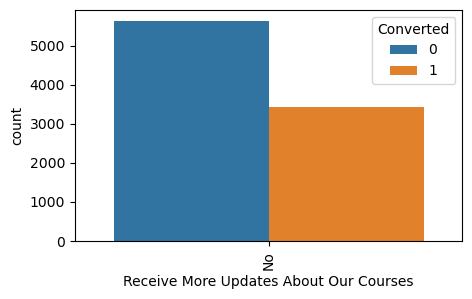

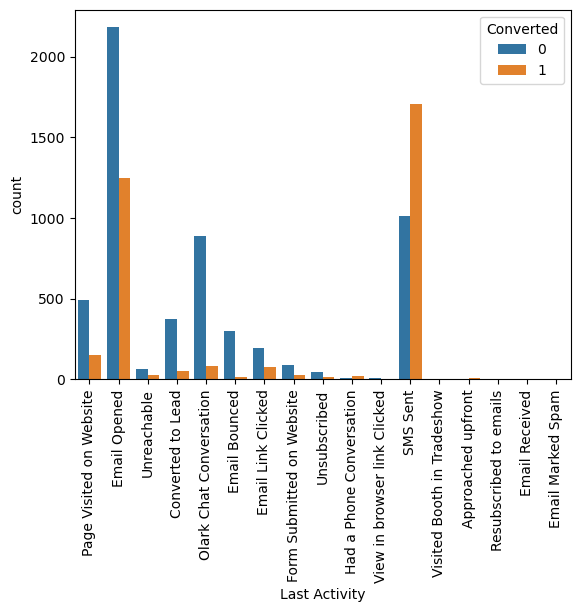

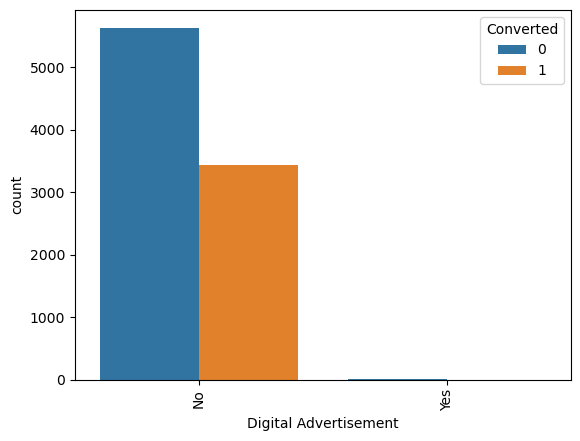

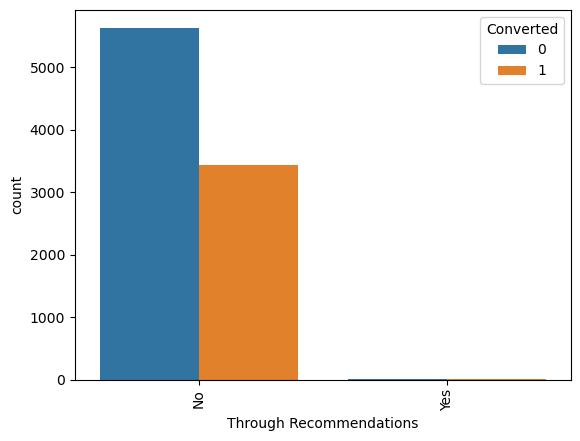

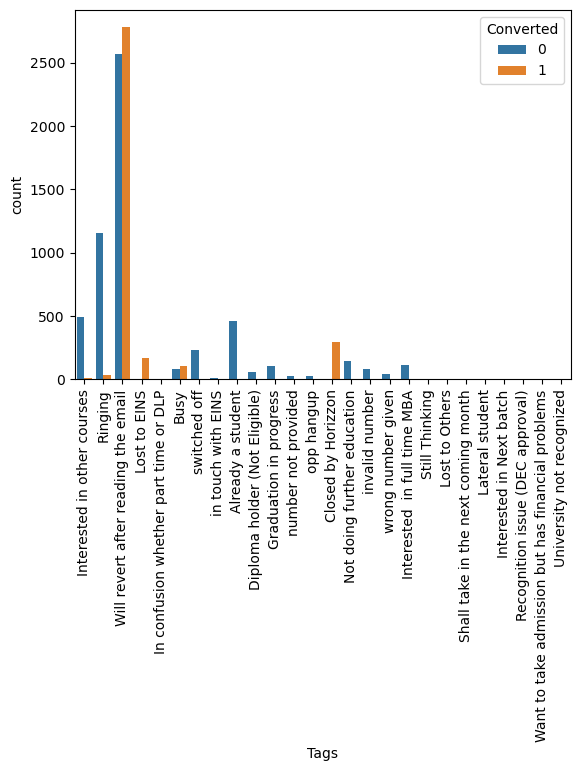

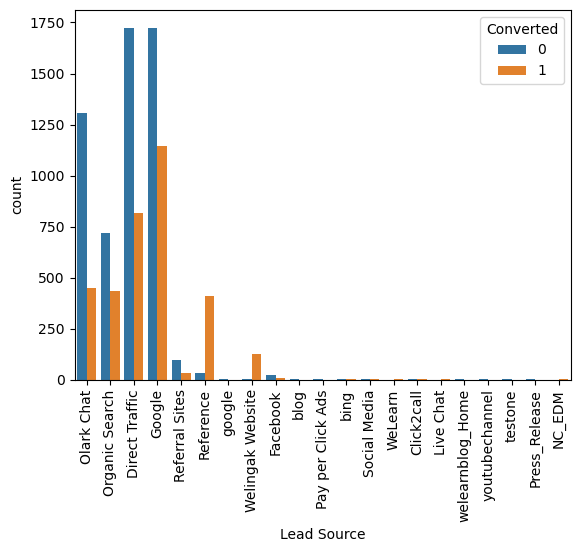

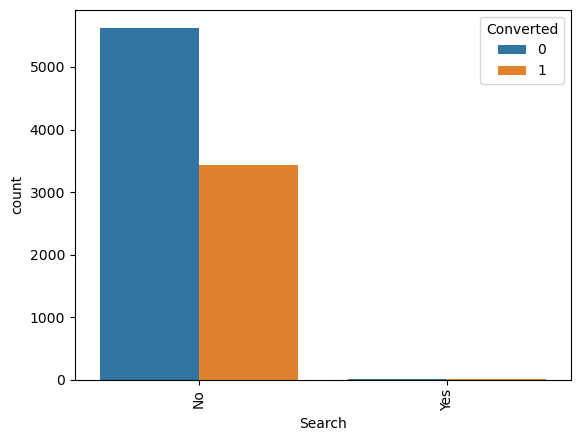

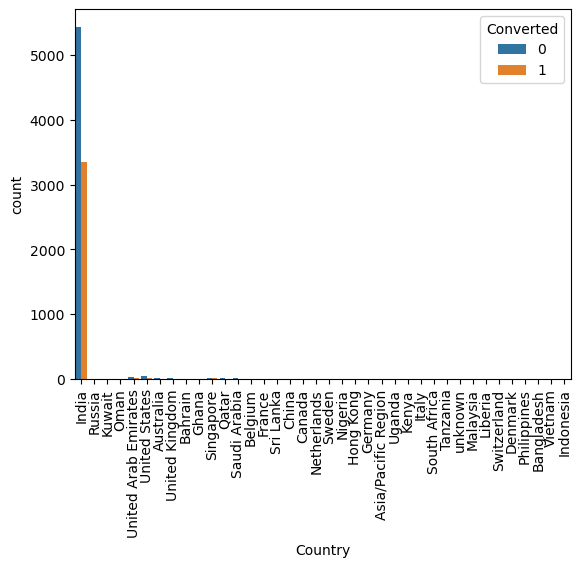

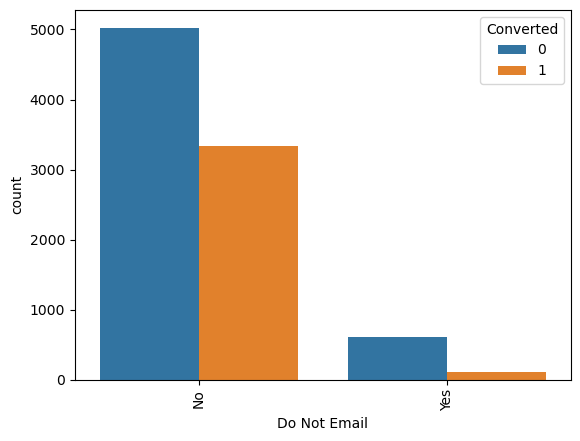

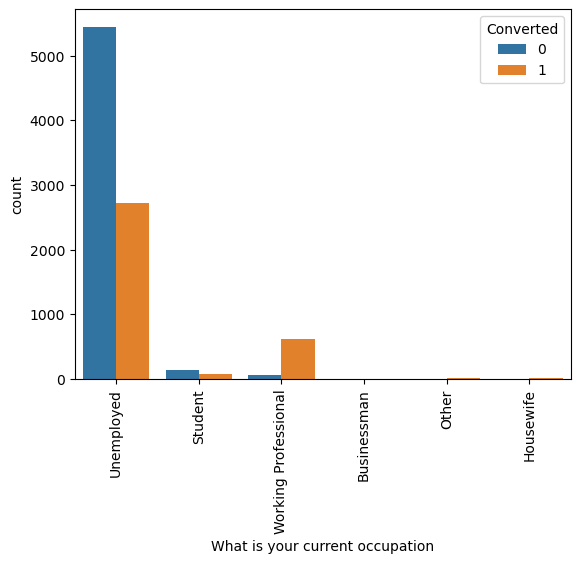

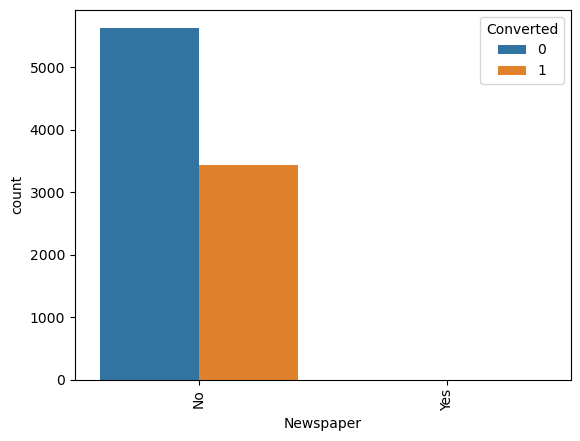

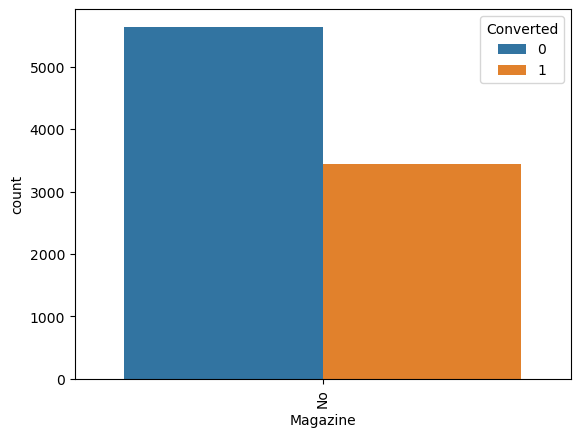

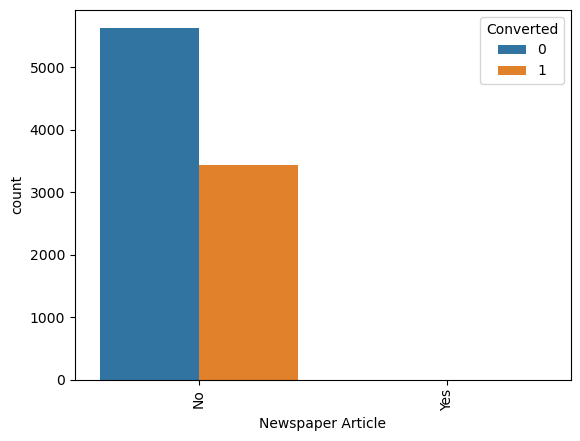

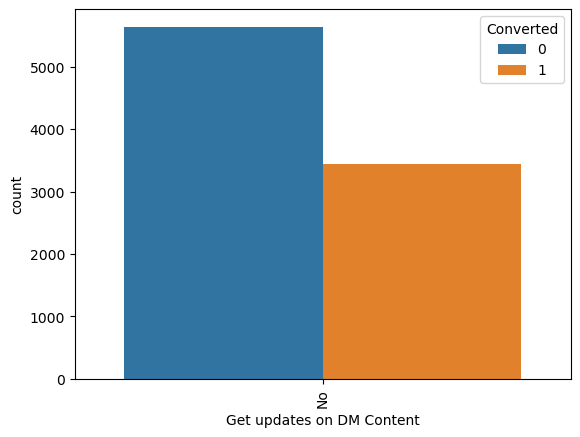

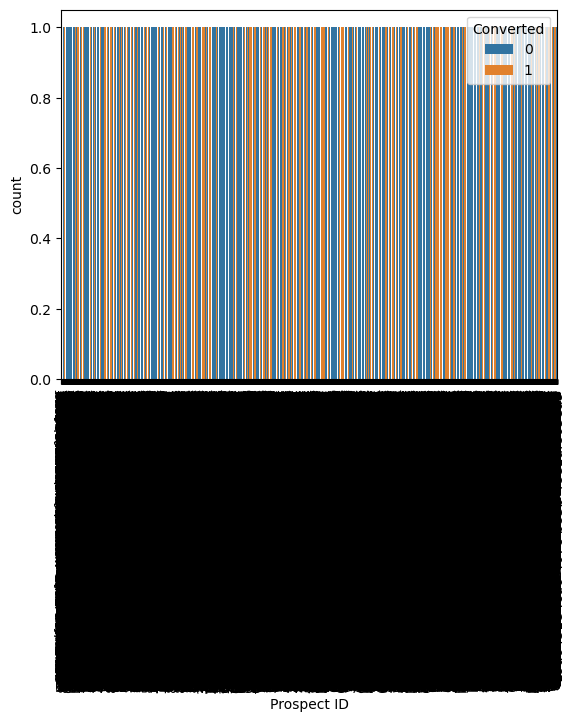

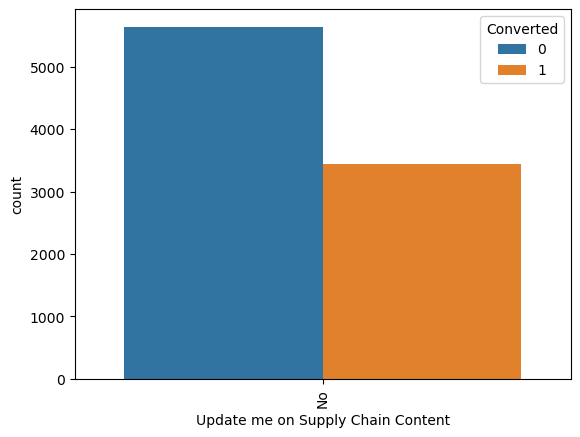

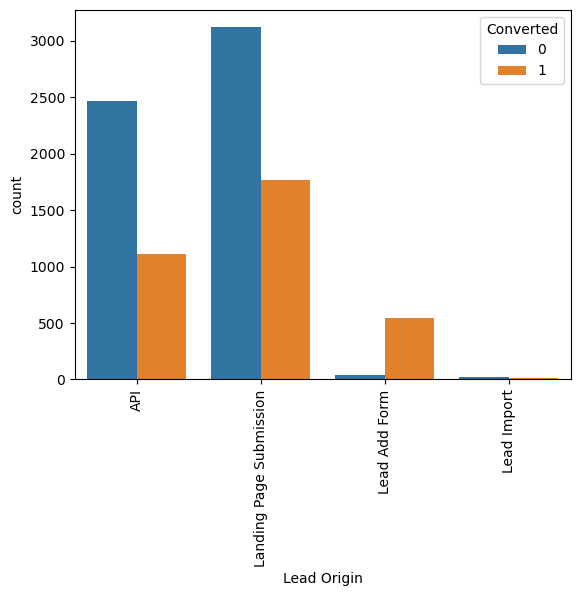

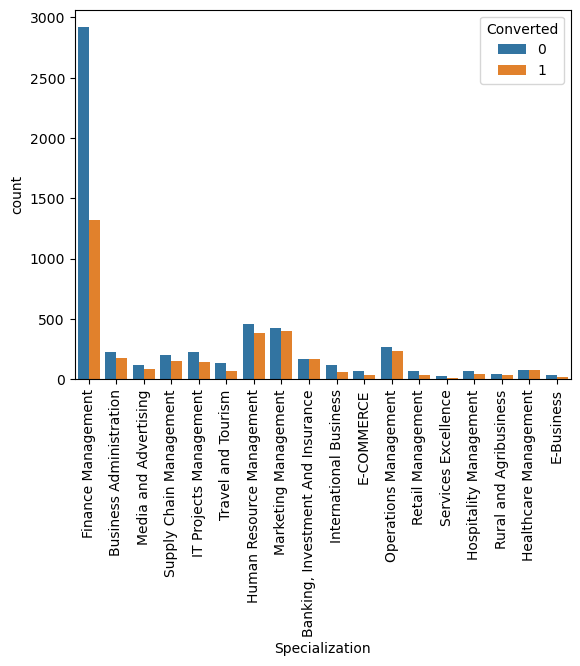

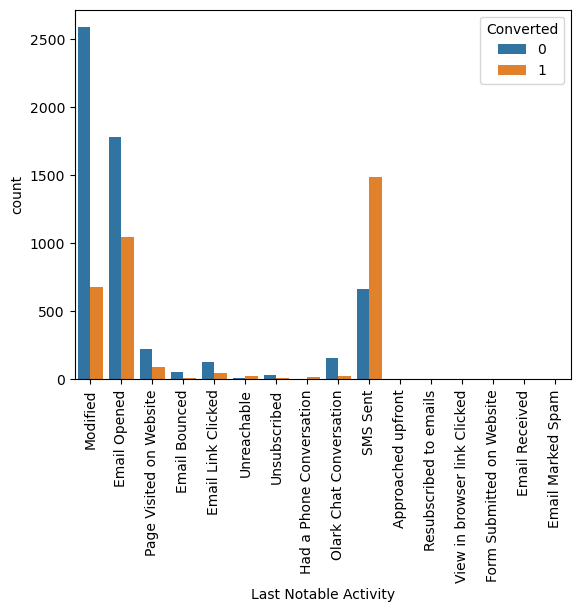

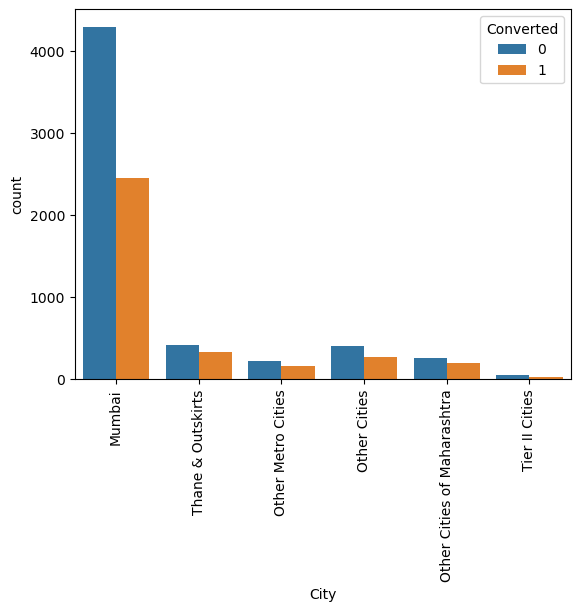

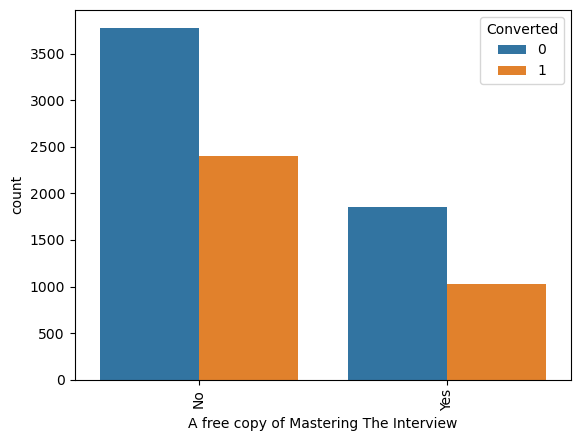

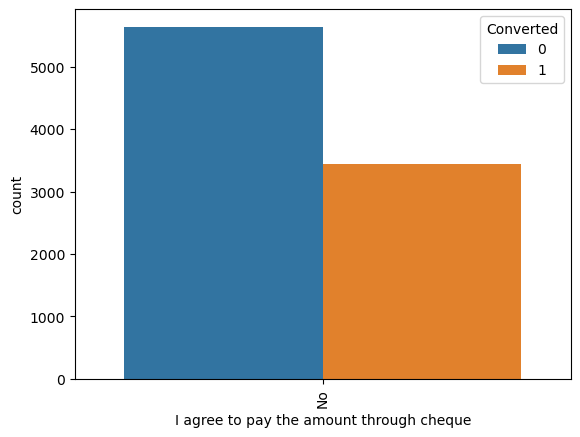

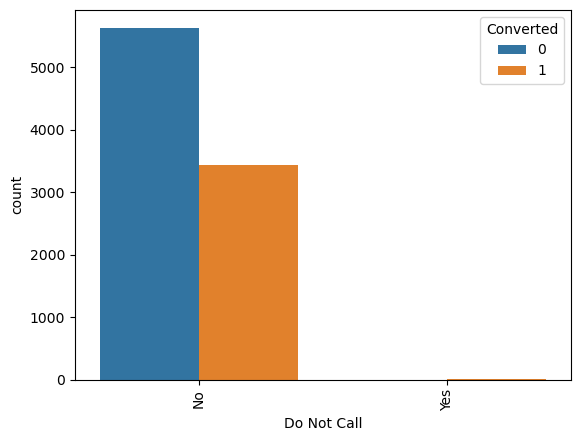

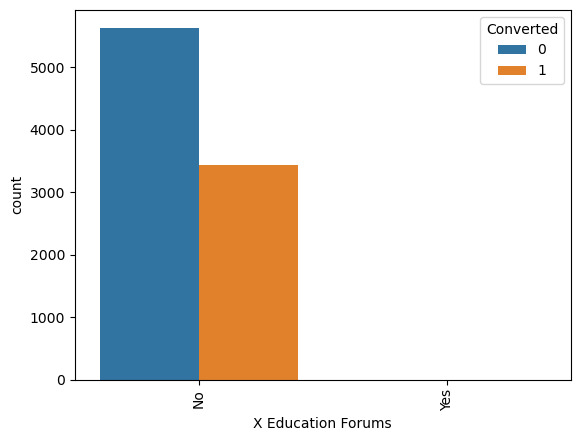

In [93]:
fig, axs = plt.subplots(figsize = (5,3))
for i in cat_col:
    sns.countplot(x = i, hue="Converted", data = lead_data)
    plt.xticks(rotation = 90)
    plt.show()

- 'Receive More Updates About out Courses', 'Digital Advertisement', 'Through Recommendations', 'Lead Number','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',,'Update me on Supply Chain Content' ' 'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country' contains just one value and hence no inference.
- Last activity: SMS sent has the hightes conversions. Need to focus on Email Opened as it has the most leads and less conversion rate.
Tags: Will revert after reading the email, closed by horizzon, lost to EINS have a good conversion but we need to focus on 'Interested in other courses' and 'ringing' which are good in numbers but low in conversion.
- Lead source: Although refernce and Welingak website gives a good conversion but we need to focus on Olark chat and Direct traffic.
- What is your current Occupation: conversion rate is high for working professionals. Now the focus should be on unemployed leads.
- Lead Origin: API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable. A scope of improvement here.
- City: Most of the leads are from Mumbai city- 

In [94]:
# Clubbing all irrevant Last activities to "Other_Activity" category
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

In [95]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
lead_data['Tags'] = lead_data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

In [96]:
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['google'], 'Google')
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others_sources')

In [97]:
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(['Other'], 'Other_Occupation')

In [98]:
lead_data['Specialization'] = lead_data['Specialization'].replace(['Others'], 'Other_Specialization')

In [99]:
#Dropping irrelevant categorical columns
lead_data.drop(['Receive More Updates About Our Courses', 'Digital Advertisement', 'Through Recommendations', 
                'Lead Number','Search','Magazine','Newspaper Article',
                'X Education Forums','Newspaper','Update me on Supply Chain Content', 'Get updates on DM Content',
                'I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country', 'Prospect ID'], axis = 1, inplace = True)

In [100]:
items_to_remove =['Receive More Updates About Our Courses', 'Digital Advertisement', 'Through Recommendations', 
                'Lead Number','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                  'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country']
cat_col = [item for item in cat_col if item not in items_to_remove]

In [101]:
num_col.remove('Lead Number')

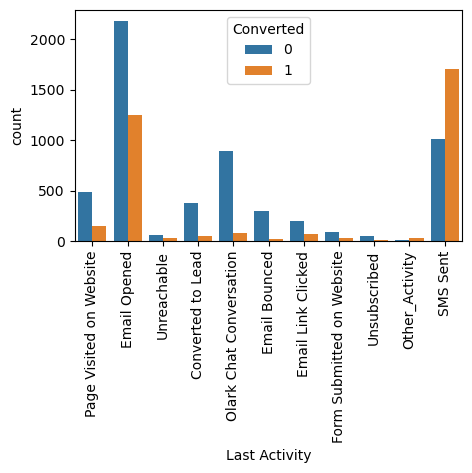

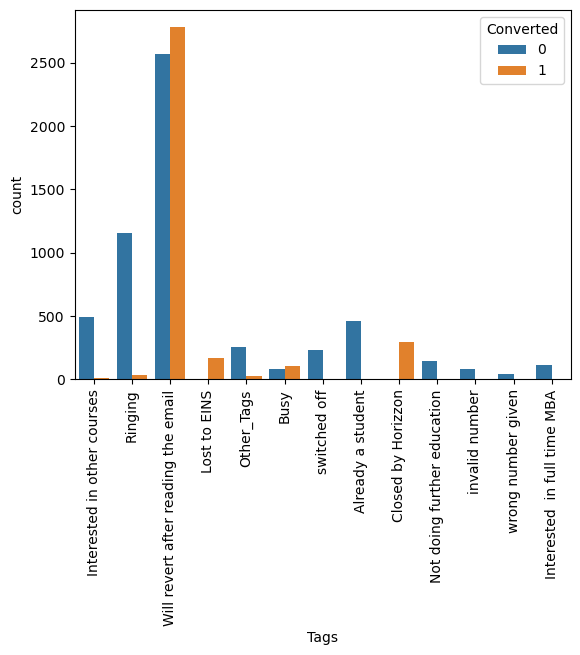

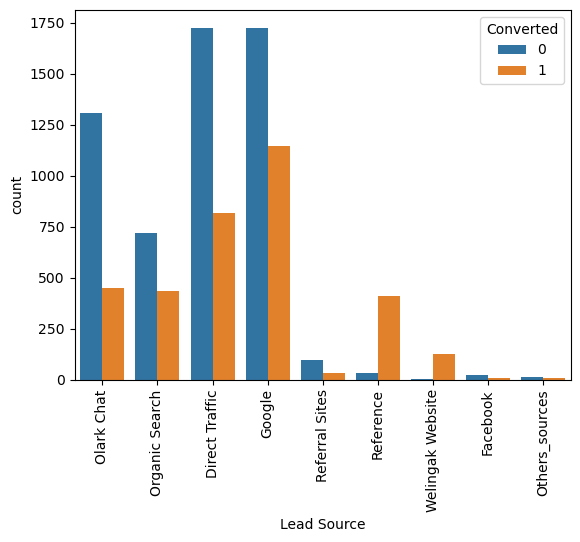

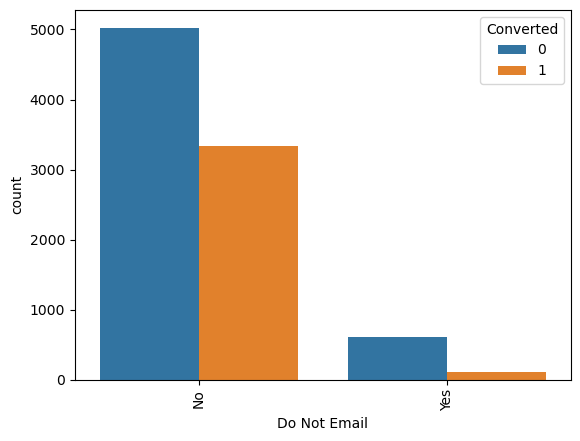

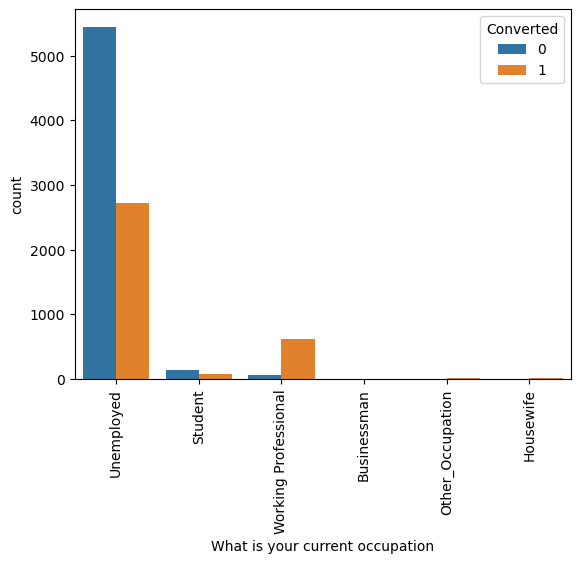

ValueError: Could not interpret value `Prospect ID` for `x`. An entry with this name does not appear in `data`.

In [102]:
fig, axs = plt.subplots(figsize = (5,3))
for i in cat_col:
    sns.countplot(x = i, hue="Converted", data = lead_data)
    plt.xticks(rotation = 90)
    plt.show()

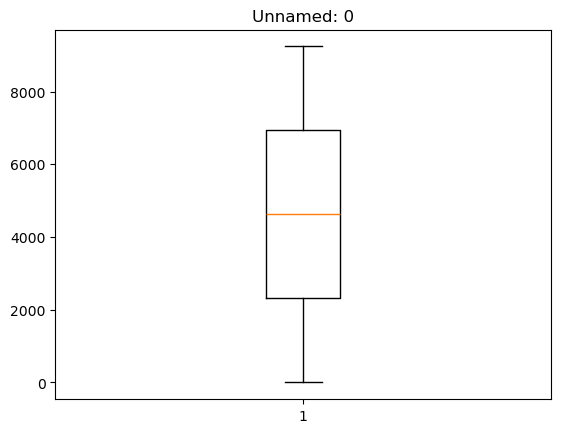

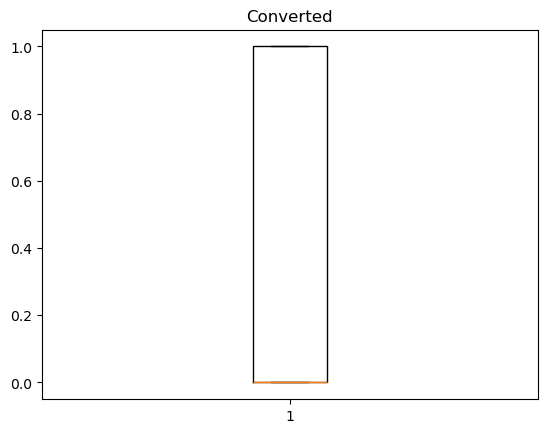

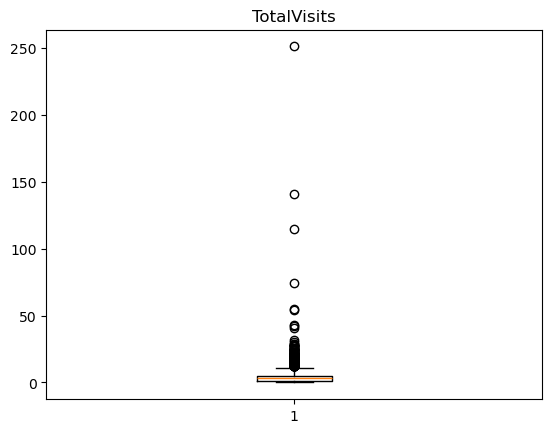

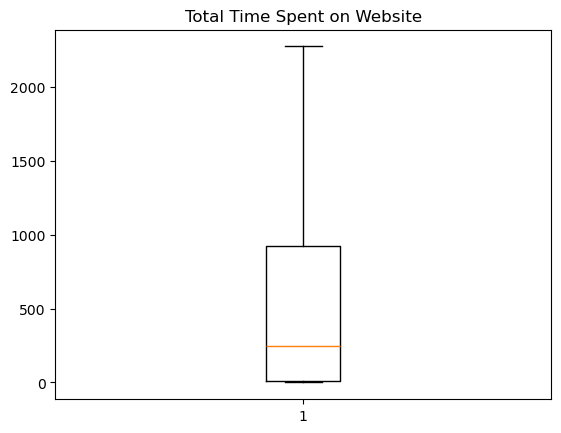

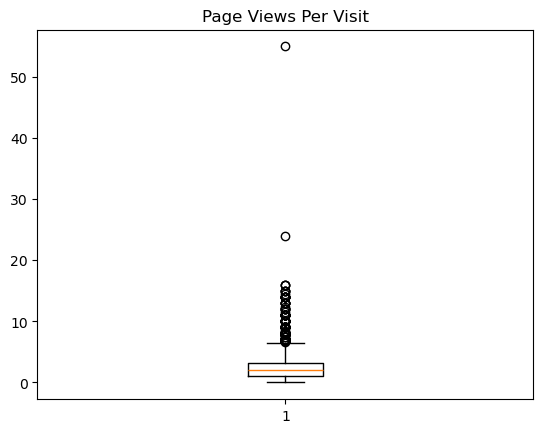

In [103]:
for i in num_col:
    plt.boxplot(data = lead_data, x=i)
    plt.title(i)
    plt.show()

- TotalVisits" and "Page Views Per Visit" have outliers that must be treated.
- On an average, a customer views less than 5 pages in one visit and spends less than 5 mins on the website.
- there is a data imbalance as the converted leads are way less than the non-converted ones.
- 'Lead number', do not contribute to the converted variable.

In [104]:
#looking at the quantikles value for 'TotalVisits' to check for outliers
lead_data['TotalVisits'].quantile([0,0.5,0.75,0.9,0.95, 0.97,0.99])

0.00     0.0
0.50     3.0
0.75     5.0
0.90     7.0
0.95    10.0
0.97    11.0
0.99    17.0
Name: TotalVisits, dtype: float64

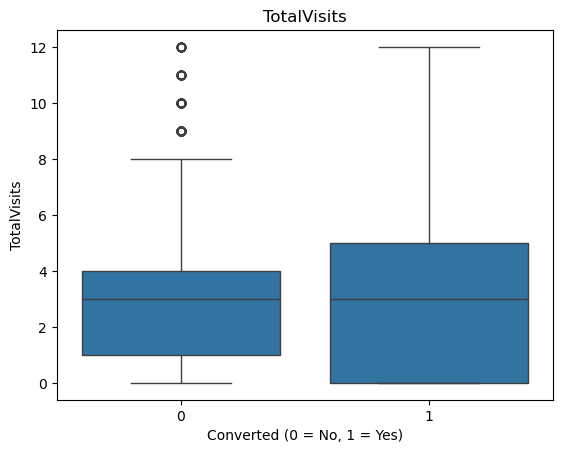

In [105]:
sns.boxplot(data = lead_data[lead_data['TotalVisits']<=12], y='TotalVisits', x = 'Converted')
plt.title('TotalVisits')
plt.xlabel('Converted (0 = No, 1 = Yes)')
plt.show()

In [106]:
# capping rows with 'TotalVisits' value>12 =12 as those are outliers
lead_data['TotalVisits'][lead_data['TotalVisits'] >12] = 12
lead_data['TotalVisits'][lead_data['TotalVisits'] <0] = 0

In [107]:
#looking at the quantiles value for 'Page Views Per Visit' to check for outliers
lead_data['Page Views Per Visit'].quantile([0,0.5,0.75,0.9,0.95, 0.97,0.99, 1])

0.00     0.0
0.50     2.0
0.75     3.2
0.90     5.0
0.95     6.0
0.97     7.0
0.99     9.0
1.00    55.0
Name: Page Views Per Visit, dtype: float64

In [108]:
lead_data[lead_data['Page Views Per Visit']> lead_data['Page Views Per Visit'].quantile(0.98)].shape[0]/rows

0.013555212695613841

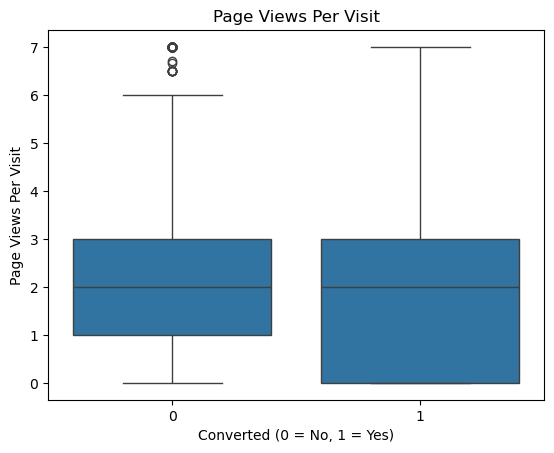

In [109]:
sns.boxplot(data = lead_data[lead_data['Page Views Per Visit']<= lead_data['Page Views Per Visit'].quantile(0.97)], y='Page Views Per Visit', x = 'Converted')
plt.title('Page Views Per Visit')
plt.xlabel('Converted (0 = No, 1 = Yes)')
plt.show()

In [110]:
#lead_data = lead_data[lead_data['TotalVisits']<= lead_data['Page Views Per Visit'].quantile(0.98)]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit']>lead_data['Page Views Per Visit'].quantile(0.97)]=lead_data['Page Views Per Visit'].quantile(0.98)
lead_data.describe()

,Unnamed: 0,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,4636.714459,0.378554,3.260194,482.887481,2.328012
std,2662.208162,0.485053,2.963920,545.256560,1.943075
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2336.250000,0.000000,1.000000,11.000000,1.000000
50%,4637.500000,0.000000,3.000000,246.000000,2.000000
75%,6944.750000,1.000000,5.000000,922.750000,3.200000
max,9239.000000,1.000000,12.000000,2272.000000,8.000000


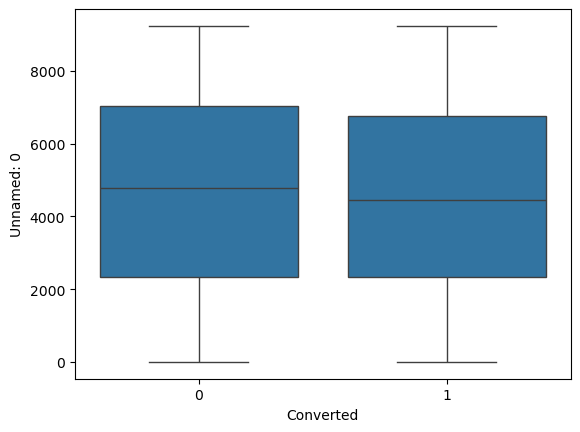

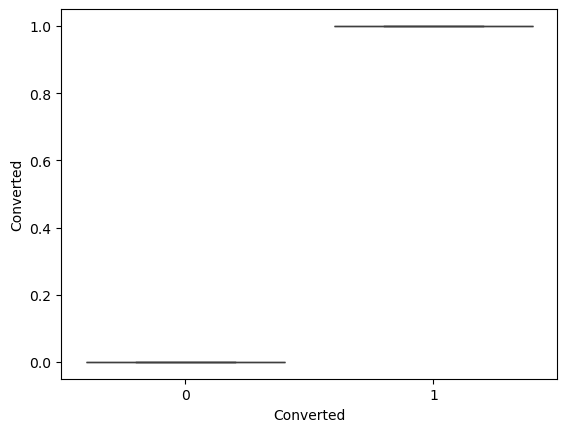

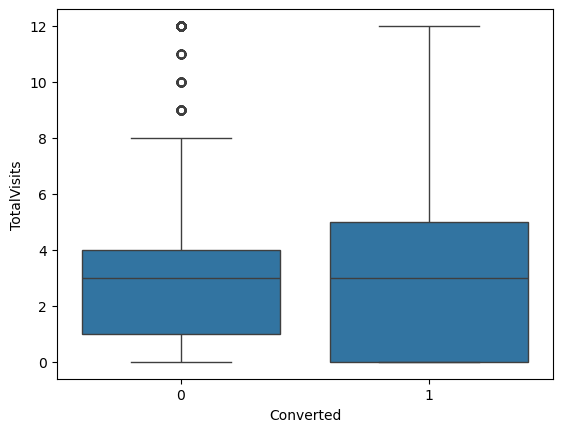

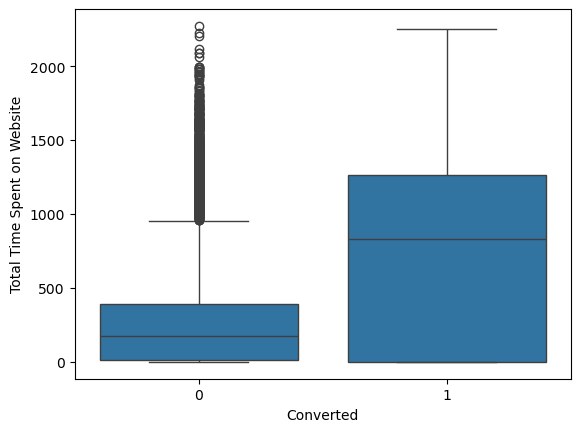

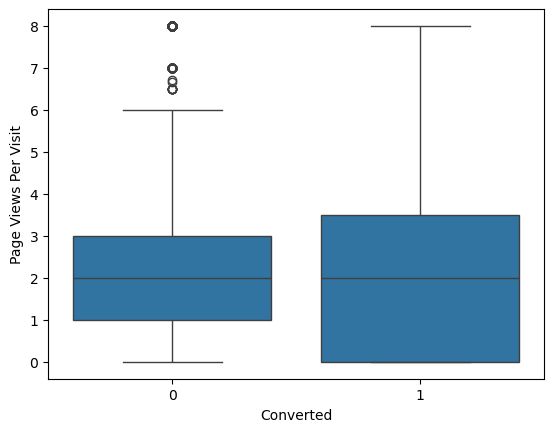

In [111]:
for i in num_col:
    sns.boxplot(data = lead_data, y=i, x = 'Converted')
    plt.show()

- TotalVisits: Converted leads have a thicker spread although te median is same as non-converted leads.
- Time spent on Website: converted leads spend more time than non-converted leads. On an average the time spent is 15 mins which is 5 times than non-converted ones.

In [112]:
lead_data.shape

(9074, 15)

#### iii) Multivariate analysis and correlation

In [113]:
corr = lead_data[num_col].corr()
corr

,Unnamed: 0,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Unnamed: 0,1.000000,-0.025258,-0.044470,-0.017945,-0.060391
Converted,-0.025258,1.000000,0.051230,0.359261,0.000669
TotalVisits,-0.044470,0.051230,1.000000,0.348582,0.745139
Total Time Spent on Website,-0.017945,0.359261,0.348582,1.000000,0.345501
Page Views Per Visit,-0.060391,0.000669,0.745139,0.345501,1.000000


##### "TotalVisits" on website is strongly positively correlated with "Page Views Per Visit"

### Step-5: Data Preparation

In [114]:
lead_data.columns

Index(['Unnamed: 0', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

In [115]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# Applying the function to the housing list
lead_data[varlist] = lead_data[varlist].apply(binary_map)

In [116]:
lead_data.head()

,Unnamed: 0,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity
0,0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,Interested in other courses,Mumbai,Modified
1,1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Ringing,Mumbai,Email Opened
2,2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened
3,3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,Modified
4,4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,Will revert after reading the email,Mumbai,Modified


In [117]:
#For categorical variables with multiple levels, create dummy features (one-hot encoded)
cat_col = set(lead_data.columns) - set(lead_data.describe().columns)
cat_col = list(cat_col)
cat_col

['Last Activity',
 'Tags',
 'Lead Origin',
 'Lead Source',
 'Specialization',
 'Last Notable Activity',
 'City',
 'What is your current occupation']

In [118]:
lead_data[cat_col].nunique()

Last Activity                      11
Tags                               13
Lead Origin                         4
Lead Source                         9
Specialization                     18
Last Notable Activity              16
City                                6
What is your current occupation     6
dtype: int64

In [119]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_data[cat_col], drop_first=True)
#dummy1 = dummy1.astype(int)
dummy1.head()

,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,...,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [120]:
# Adding the results to the master dataframe
model_data = pd.concat([lead_data, dummy1], axis=1)
model_data.head()

,Unnamed: 0,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,False,False,False,False,False,False,False,False,True,False
1,1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,False,False,False,False,False,False,False,False,True,False
2,2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,False,False,False,False,False,False,False,True,False,False
3,3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,False,False,False,False,False,False,False,False,True,False
4,4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,False,False,False,False,False,False,False,False,True,False


In [121]:
model_data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [122]:
model_data.drop(cat_col, axis=1, inplace= True)
model_data.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,...,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0.0,0,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,5.0,674,2.5,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,0,0,1,2.0,1532,2.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,0,0,0,1.0,305,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,1,2.0,1428,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [123]:
model_data = model_data.replace({True: 1, False: 0})
model_data.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,...,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,5.0,674,2.5,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,2.0,1532,2.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Step-6: Train-Test split

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
# Putting feature variable to X
X = model_data.drop(['Converted'], axis=1)
# putting teh target variable to y
y = model_data['Converted']

In [126]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,...,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2.0,1532,2.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [127]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [132]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step-7: Feature Scaling

In [133]:
X.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,...,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,...,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.078907,0.000220,3.260194,482.887481,2.328012,0.034384,0.029425,0.378223,0.012784,0.107119,...,0.074939,0.049151,0.041547,0.082103,0.008155,0.000992,0.001653,0.022702,0.899162,0.074609
std,0.269608,0.014845,2.963920,545.256560,1.943075,0.182223,0.169003,0.484971,0.112347,0.309282,...,0.263308,0.216196,0.199563,0.274536,0.089942,0.031480,0.040627,0.148961,0.301130,0.262774
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,5.000000,922.750000,3.200000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,12.000000,2272.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [134]:
scaling_var = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]

In [135]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[scaling_var] = scaler.fit_transform(X_train[scaling_var])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,...,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
2928,0,0,0.166667,0.178347,0.2500,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
973,1,0,0.166667,0.085355,0.2500,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9060,0,0,0.000000,0.000000,0.0000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4648,0,0,0.166667,0.619946,0.2500,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
7839,0,0,0.416667,0.711590,0.3125,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [136]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,...,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
count,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,...,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000
mean,0.078885,0.000315,0.272752,0.217585,0.292463,0.034640,0.028185,0.373799,0.011809,0.105338,...,0.074476,0.048181,0.041883,0.078885,0.008030,0.001102,0.001575,0.022201,0.898284,0.075894
std,0.269581,0.017744,0.247164,0.244868,0.243552,0.182881,0.165513,0.483849,0.108035,0.307012,...,0.262565,0.214166,0.200338,0.269581,0.089258,0.033184,0.039653,0.147349,0.302299,0.264849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.083333,0.004492,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.250000,0.110961,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.416667,0.413522,0.416250,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [137]:
# Checking the Conversion Rate
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

37.85541106458012

##### We have approx 38% conversion rate.

In [69]:
# # Finding highly correlated variables to eliminate multicollinearity
# plt.figure(figsize = (40,20))        # Size of the figure
# sns.heatmap(lead_data.corr(),annot = True)
# plt.show()

In [70]:
# corr = lead_data.corr()

In [71]:
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns

In [72]:
# to find highly correlated values
# high_corr = []
# for i in corr.index:
#     for j in corr.columns:
#         if (corr.loc[i,j]>0.8) or (corr.loc[i,j]<-0.8):
#             high_corr.append([i,j,corr.loc[i,j]])

In [73]:
# filtering the features for 1 as correlation value
# high_corr = pd.DataFrame(high_corr, columns = ['feature1', 'feature2', 'corr_value'])
# high_corr = high_corr[high_corr['corr_value']<1]
# high_corr

In [74]:
# # Dropping highly correlated variables
# X_train.drop(['Page Views Per Visit', 'Last Notable Activity_Email Opened', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed', 'Lead Origin_Lead Import', 'Lead Origin_Lead Add Form', 'What is your current occupation_Unemployed'], axis = 1, inplace = True)
# X_test.drop(['Page Views Per Visit', 'Last Notable Activity_Email Opened', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed', 'Lead Origin_Lead Import', 'Lead Origin_Lead Add Form', 'What is your current occupation_Unemployed'], axis = 1, inplace = True)

### Step-8: Model building

In [138]:
import statsmodels.api as sm

In [139]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6270
Model Family:                Binomial   Df Model:                           80
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1578.8
Date:                Tue, 17 Sep 2024   Deviance:                       3157.6
Time:                        02:13:40   Pearson chi2:                 1.34e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5665
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   18.0661   2.16e+05   8.36e-05      1.000   -4.23e+05    4.23e+05
Do Not Email                                            -1.6512      0.289     -5.717      0.000      -2.217      -1.085
Do Not Call                                             23.0318    1.4e+05      0.000      1.000   -2.74e+05    2.74e+05
TotalVisits                                              0.7154      0.297      2.412      0.016       0.134       1.297
Total Time Spent on Website                              4.8844      0.231     21.152      0.000       4.432       5.337
Page Views Per Visit                                    -0.7683      0.329     -2.337      0.019      -1.413      -0.124
Last Activity_Email Bounced                             -0.8458      0.819     -1.033      0.302      -2.451       0.759
Last Activity_Email Link Clicked                         0.8702      0.553      1.573      0.116      -0.214       1.955
Last Activity_Email Opened                               0.0355      0.329      0.108      0.914      -0.609       0.680
Last Activity_Form Submitted on Website                  0.2566      0.520      0.493      0.622      -0.763       1.277
Last Activity_Olark Chat Conversation                   -0.5272      0.339     -1.556      0.120      -1.191       0.137
Last Activity_Other_Activity                             1.0855      1.056      1.028      0.304      -0.984       3.155
Last Activity_Page Visited on Website                    0.3549      0.382      0.930      0.352      -0.393       1.103
Last Activity_SMS Sent                                   1.0318      0.307      3.363      0.001       0.431       1.633
Last Activity_Unreachable                                0.9716      0.751      1.293      0.196      -0.501       2.444
Last Activity_Unsubscribed                               2.0632      1.414      1.459      0.145      -0.708       4.834
Tags_Busy                                                4.4682      0.801      5.576      0.000       2.898       6.039
Tags_Closed by Horizzon                                 10.3970      1.070      9.721      0.000       8.301      12.493
Tags_Interested  in full time MBA                        1.4945      1.098      1.361      0.173      -0.658       3.646
Tags_Interested in other courses                         1.9264      0.837      2.302      0.021       0.286       3.567
Tags_Lost to EINS                                       10.1972      1.067      9.557      0.000       8.106      12.288
Tags_Not doing further education                         0.7311      1.510      0.484      0.628      -2.229       3.691
Tags_Other_Tags                                          2

### Step-9: Feature Selection using RFE

In [140]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [142]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [143]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False,  True,  True,  True, False,
       False,  True, False, False,  True,  True, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True])

In [155]:
rank_features = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), columns = ['Feature', 'Selected', 'rank'])
rank_features = rank_features.sort_values(by='rank', ascending=False)
rank_features.head(10)

,Feature,Selected,rank
58,Last Notable Activity_Email Opened,False,66
59,Last Notable Activity_Email Received,False,65
65,Last Notable Activity_Resubscribed to emails,False,64
8,Last Activity_Form Submitted on Website,False,63
44,Specialization_Human Resource Management,False,62
7,Last Activity_Email Opened,False,61
45,Specialization_IT Projects Management,False,60
69,Last Notable Activity_View in browser link Cli...,False,59
71,City_Other Cities of Maharashtra,False,58
51,Specialization_Rural and Agribusiness,False,57


In [156]:
col = X_train.columns[rfe.support_]

In [157]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Not doing further education',
       'Tags_Other_Tags', 'Tags_invalid number', 'Tags_wrong number given',
       'Lead Origin_Landing Page Submission', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others_sources',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Mana

#### Assessing the model with StatsModel

In [158]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1744.3
Date:                Tue, 17 Sep 2024   Deviance:                       3488.6
Time:                        02:25:09   Pearson chi2:                 1.18e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5433
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.8672      0.339    -11.412      0.000      -4.531      -3.203
Do Not Email                                            -1.9109      0.218     -8.778      0.000      -2.338      -1.484
Total Time Spent on Website                              4.3790      0.187     23.428      0.000       4.013       4.745
Last Activity_Other_Activity                             1.9758      0.651      3.034      0.002       0.700       3.252
Last Activity_Unsubscribed                               2.1161      0.614      3.449      0.001       0.913       3.319
Tags_Busy                                                2.8859      0.314      9.197      0.000       2.271       3.501
Tags_Closed by Horizzon                                  8.2244      0.755     10.889      0.000       6.744       9.705
Tags_Lost to EINS                                        8.1879      0.752     10.890      0.000       6.714       9.662
Tags_Ringing                                            -1.6110      0.327     -4.931      0.000      -2.251      -0.971
Tags_Will revert after reading the email                 3.6811      0.206     17.879      0.000       3.278       4.085
Tags_switched off                                       -1.0911      0.568     -1.922      0.055      -2.204       0.021
Lead Origin_Lead Add Form                                3.7848      0.267     14.168      0.000       3.261       4.308
Lead Origin_Lead Import                                  2.1434      0.614      3.489      0.000       0.939       3.347
Last Notable Activity_SMS Sent                           2.7992      0.120     23.241      0.000       2.563       3.035
What is your current occupation_Unemployed              -1.5734      0.311     -5.067      0.000      -2.182      -0.965
What is your current occupation_Working Professional     1.2872      0.394      3.269      0.001       0.516       2.059
========================================================================================================================
"""

In [159]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2928    0.273184
973     0.392692
9060    0.000865
4648    0.977121
7839    0.997166
1228    0.951449
2804    0.147841
4864    0.962260
7392    0.893937
1197    0.016196
dtype: float64

In [160]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([2.73183791e-01, 3.92691625e-01, 8.65291805e-04, 9.77120640e-01,
       9.97166351e-01, 9.51448740e-01, 1.47840902e-01, 9.62259884e-01,
       8.93937439e-01, 1.61956084e-02])

In [161]:
#Creating a dataframe with actual and predicted prob
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID
0,0,0.273184,2928
1,0,0.392692,973
2,0,0.000865,9060
3,1,0.977121,4648
4,1,0.997166,7839


In [162]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final['Conv_Prob'].map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID,predicted
0,0,0.273184,2928,0
1,0,0.392692,973,0
2,0,0.000865,9060,0
3,1,0.977121,4648,1
4,1,0.997166,7839,1


In [163]:
from sklearn import metrics

In [165]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'] )
print(confusion)

[[3637  268]
 [ 378 2068]]


In [166]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted']))
print(metrics.recall_score(y_train_pred_final['Converted'], y_train_pred_final['predicted']))

0.8982837348449063
0.8454619787408013


In [168]:
# checking VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [169]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,What is your current occupation_Unemployed,5.47
8,Tags_Will revert after reading the email,4.45
1,Total Time Spent on Website,2.00
7,Tags_Ringing,1.78
14,What is your current occupation_Working Profes...,1.61
12,Last Notable Activity_SMS Sent,1.55
5,Tags_Closed by Horizzon,1.34
10,Lead Origin_Lead Add Form,1.33
0,Do Not Email,1.16
9,Tags_switched off,1.16


In [171]:
# since the vif for 'What is your current occupation_Unemployed' >5 so dropping and remodelling
col = col.drop('What is your current occupation_Unemployed', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Last Activity_Other_Activity', 'Last Activity_Unsubscribed',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Last Notable Activity_SMS Sent',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [172]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1757.5
Date:                Tue, 17 Sep 2024   Deviance:                       3515.1
Time:                        02:35:50   Pearson chi2:                 1.15e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5414
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.3086      0.213    -24.976      0.000      -5.725      -4.892
Do Not Email                                            -1.8611      0.215     -8.640      0.000      -2.283      -1.439
Total Time Spent on Website                              4.4088      0.186     23.641      0.000       4.043       4.774
Last Activity_Other_Activity                             1.9348      0.649      2.979      0.003       0.662       3.208
Last Activity_Unsubscribed                               2.0346      0.612      3.327      0.001       0.836       3.233
Tags_Busy                                                2.7658      0.310      8.908      0.000       2.157       3.374
Tags_Closed by Horizzon                                  8.0959      0.753     10.746      0.000       6.619       9.572
Tags_Lost to EINS                                        8.0594      0.751     10.737      0.000       6.588       9.531
Tags_Ringing                                            -1.7404      0.324     -5.364      0.000      -2.376      -1.105
Tags_Will revert after reading the email                 3.5740      0.203     17.628      0.000       3.177       3.971
Tags_switched off                                       -1.2166      0.566     -2.148      0.032      -2.327      -0.107
Lead Origin_Lead Add Form                                3.8102      0.265     14.398      0.000       3.292       4.329
Lead Origin_Lead Import                                  2.1164      0.613      3.455      0.001       0.916       3.317
Last Notable Activity_SMS Sent                           2.7791      0.120     23.184      0.000       2.544       3.014
What is your current occupation_Working Professional     2.8055      0.257     10.914      0.000       2.302       3.309
========================================================================================================================
"""

In [174]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Conv_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final['Conv_Prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID,predicted
0,0,0.279230,2928,0
1,0,0.397982,973,0
2,0,0.000868,9060,0
3,1,0.977638,4648,1
4,1,0.997235,7839,1


In [176]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted']))
print(metrics.recall_score(y_train_pred_final['Converted'], y_train_pred_final['predicted']))

0.8976539127696426
0.8434178250204415


In [177]:
# the recall and accuracy are almost the same. Now checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,1.90
1,Total Time Spent on Website,1.87
12,Last Notable Activity_SMS Sent,1.55
10,Lead Origin_Lead Add Form,1.32
5,Tags_Closed by Horizzon,1.20
13,What is your current occupation_Working Profes...,1.18
7,Tags_Ringing,1.15
0,Do Not Email,1.13
3,Last Activity_Unsubscribed,1.08
4,Tags_Busy,1.06


In [178]:
# VIF scores are less than 5 and recall >80%. so this model is the final model.